In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('../Titanic/train.csv')
df_test = pd.read_csv('../Titanic/test.csv')

In [3]:
df_train.head()    # here, survived ('y_act') colm is present

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test. head()   # her, survived (y) colm is absent, we have to predict the values of y

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# from above info, we can see that, Age, Cabin, Embarked colms are having missing values.
# Cabin colm contains large missing values(891 - 204 = 687), so we can drop 'Cabin ' column.
# by viewing data, we can see that, pass. Id, Name, Ticket colms doesnot contain useful info, so we can drop them as well

In [7]:
selected_columns = list(df_train.columns)
selected_columns

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

In [8]:
selected_columns.remove('PassengerId')    # Delete the non-required colm from list of colm names
selected_columns.remove('Name')
selected_columns.remove('Ticket')
selected_columns.remove('Cabin')
selected_columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [9]:
df_train[selected_columns]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
df_train[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


# Missing Data Handling

<AxesSubplot:>

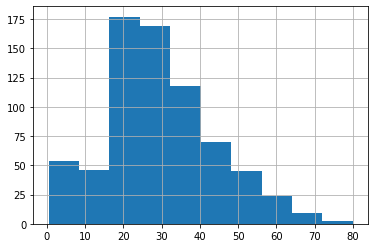

In [11]:
df_train['Age'].hist()    # It is used to see the data distribution

In [12]:
# Here, we can see that, person having age more than 72 are very less, so, we can consider them as outlier.
# so to fill missing values in Age, we can use mean/median value, we will use median here

In [13]:
df_train['Age'].mean(), df_train['Age'].median()    # median is better aas outliers are present

(29.69911764705882, 28.0)

In [14]:
df_train['Age'].isna().sum(), df_test['Age'].isna().sum() #we can check how many missing values are present in train & test

(177, 86)

In [15]:
df_train['Age'].fillna(df_train['Age'].median(), inplace = True)  # here, we fill na data of train & test by median value
df_test['Age'].fillna(df_train['Age'].median(), inplace = True) #we have to use, median of training data for test data also

In [16]:
df_train['Age'].isna().sum(), df_test['Age'].isna().sum()

(0, 0)

In [17]:
df_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
df_train['Embarked'].isna().sum(), df_test['Embarked'].isna().sum()

(2, 0)

In [19]:
df_train['Embarked'].mode()  #It returns series object, but we can't use it to fillna values(bcz there may be multiple values of mode)

0    S
dtype: object

In [20]:
# Here, we can use mode to fill missing data in Embarked as it is text data
df_train['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace= True)
df_test['Embarked'].fillna(df_train['Embarked'].mode().iloc[0], inplace= True)

In [21]:
df_train['Embarked'].isna().sum()

0

In [22]:
df_train[selected_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [23]:
df_test.isna().sum()   # in test dare 1 value of fare is missing

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:>

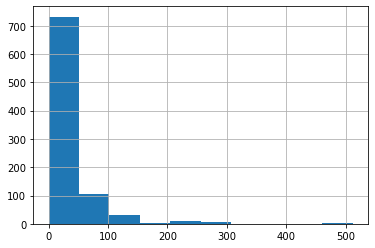

In [24]:
df_train['Fare'].hist()   # here, outliers are present

In [25]:
df_train['Fare'].mean(), df_train['Fare'].median()

(32.2042079685746, 14.4542)

In [26]:
df_test['Fare'].fillna(df_train['Fare'].median(), inplace=True)

In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Feature Encoding

In [28]:
# Inthis data, 2 colms are present in text format, which we have to convert in numeric format by using Feature encoding
#1) Age:- has 2 categories => Male, female  ) Embarked:- has 3 categories => S, C, Q

In [29]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [30]:
df_train['Sex_encoded'] = df_train['Sex'].apply(lambda X: 0 if X=='male' else 1)
df_test['Sex_encoded'] = df_test['Sex'].apply(lambda X: 0 if X=='male' else 1)

In [31]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [32]:
selected_columns

['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [33]:
selected_columns.append('Sex_encoded')   # Add new created colm into selected colm list

In [34]:
selected_columns.remove('Sex_encoded')

In [35]:
temp = pd.get_dummies(df_train['Embarked'])
df_train = pd.concat([df_train, temp], axis =1)

In [36]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1


In [37]:
temp = pd.get_dummies(df_test['Embarked'])
df_test = pd.concat([df_test, temp], axis =1)

In [38]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1


In [39]:
selected_columns.extend(temp.columns)

In [40]:
selected_columns.append('Sex_encoded')
selected_columns.append('Survived')

In [41]:
selected_columns.remove('Sex_encoded')

# Feature Selection

In [42]:
# Here, we use co-relation to select the parameters/ colms for ML model. from cor value, we decide which colm is to be used
df_train[selected_columns].corr()  # Gives the correction of every colm with itself and other colms

,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,Survived
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,1.000000
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500,-0.243292,0.221009,0.074053,-0.338481
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688,0.030248,-0.031415,-0.006729,-0.064910
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651,-0.059528,-0.026354,0.068734,-0.035322
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225,-0.011069,-0.081228,0.060814,0.081629
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000,0.269335,-0.117216,-0.162184,0.257307
C,0.168240,-0.243292,0.030248,-0.059528,-0.011069,0.269335,1.000000,-0.148258,-0.782742,0.168240
Q,0.003650,0.221009,-0.031415,-0.026354,-0.081228,-0.117216,-0.148258,1.000000,-0.499421,0.003650
S,-0.149683,0.074053,-0.006729,0.068734,0.060814,-0.162184,-0.782742,-0.499421,1.000000,-0.149683
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307,0.168240,0.003650,-0.149683,1.000000


In [43]:
df_train[selected_columns].corr()['Survived']  # Reln between all colms with y colm

,Survived,Survived
Survived,1.000000,1.000000
Pclass,-0.338481,-0.338481
Age,-0.064910,-0.064910
SibSp,-0.035322,-0.035322
Parch,0.081629,0.081629
Fare,0.257307,0.257307
C,0.168240,0.168240
Q,0.003650,0.003650
S,-0.149683,-0.149683
Survived,1.000000,1.000000


In [44]:
selected_columns.remove('Survived')

In [45]:
selected_columns

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Embarked',
 'C',
 'Q',
 'S',
 'Survived']

In [46]:
selected_columns.remove('Sex')
selected_columns.remove('Embarked')

In [47]:
selected_columns.remove('Survived')

# Ml model creation

In [48]:
# Here, we select a ML model, train the model and find the accuracy of the model

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 25)
model.fit(df_train[selected_columns], df_train['Survived'])

RandomForestClassifier(random_state=25)

In [50]:
model.score(df_train[selected_columns], df_train['Survived'])

0.9551066217732884

In [51]:
y_pred = model.predict(df_test[selected_columns])   # predict the y values for test data

In [52]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
df_test['Survived'] = y_pred

In [54]:
selected_columns.append('Sex_encoded')

In [55]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1,0
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,0,1,0


In [56]:
df_test[[ 'PassengerId', 'Name', 'Survived']]   # List of persons who will survive in test data

,PassengerId,Name,Survived
0,892,"Kelly, Mr. James",0
1,893,"Wilkes, Mrs. James (Ellen Needs)",0
2,894,"Myles, Mr. Thomas Francis",0
3,895,"Wirz, Mr. Albert",1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0
...,...,...,...
413,1305,"Spector, Mr. Woolf",0
414,1306,"Oliva y Ocana, Dona. Fermina",1
415,1307,"Saether, Mr. Simon Sivertsen",0
416,1308,"Ware, Mr. Frederick",0


In [57]:
df_test[[ 'PassengerId', 'Survived']].to_csv('Titanic_submission.csv', index=False) # Used to convert dataframe into csv file

# Hyper Parameter Tunning

In [58]:
dict1 = {'criterion':['gini', 'entropy'],
         'max_depth':[2,3,4,5,6], 
         'min_samples_leaf':[2,3,4,5,6], 
         'min_samples_split':[2,3,4,5,6],
        'n_estimators':[25, 50, 75, 100]}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid_cv = GridSearchCV(RandomForestClassifier(), dict1, cv = 5, n_jobs =-1) 
grid_cv.fit(df_train[selected_columns], df_train['Survived'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [25, 50, 75, 100]})

In [61]:
grid_cv.best_params_     # Here, accuracy increase with increase in max depth

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [62]:
model_final = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_leaf=2, min_samples_split=6, n_estimators= 100, random_state=25) 
model_final.fit(df_train[selected_columns], df_train['Survived'])
model_final.score(df_train[selected_columns], df_train['Survived'])

0.8630751964085297

In [63]:
y_pre = model_final.predict(df_test[selected_columns])

In [64]:
y_pre

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
df_test.drop('Survived', axis =1, inplace=True)

In [66]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,NaN,S,0,0,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,1,0,0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0,0,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,NaN,S,0,0,0,1


In [67]:
df_test['Survived'] = y_pre

In [68]:
df_test[['PassengerId', 'Survived']].to_csv('New_Titanic_Submission.csv', index=False)

# Feature Creation

In [69]:
# Her, new features/colms are created which are relavent to o/p colm and that colm is also used for ml model creation
# here, we are having name colm which contains info of name title like Mr, Mrs, Miss, Rev etc, we can extract it & use it

In [70]:
str1 = 'Braund, Mr. Owen Harris'
str1.split(',')

['Braund', ' Mr. Owen Harris']

In [71]:
str1.split(',')[1]

' Mr. Owen Harris'

In [72]:
str1.split(',')[1].split('.')

[' Mr', ' Owen Harris']

In [73]:
str1.split(',')[1].split('.')[0]  # But it has space at start

' Mr'

In [74]:
str1.split(',')[1].split('.')[0].lstrip()

'Mr'

In [75]:
df_train['Name_Title'] = df_train['Name'].apply(lambda X: X.split(',')[1].split('.')[0].lstrip())

In [76]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0,Mr


In [77]:
df_train['Name_Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Mlle              2
Lady              1
the Countess      1
Don               1
Ms                1
Sir               1
Capt              1
Jonkheer          1
Mme               1
Name: Name_Title, dtype: int64

In [78]:
#Here, no of name title are present, we will consider first 6 title as separate colm and remaining all will be under others

In [79]:
title = ['Mr', 'Mrs', 'Miss', 'Master', 'Dr', 'Rev'] # create list of required colms

In [80]:
# if the name title is present in title list, we will keep it as it is, if not, we will replace it by other 

In [109]:
df_train['Name_Title'] = df_train['Name_Title'].apply(lambda X:  X if X in title else 'Other')
df_test['Name_Title'] = df_train['Name_Title'].apply(lambda X:  X if X in title else 'Other')

In [82]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_encoded,C,Q,S,Name_Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,0,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,1,0,0,1,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,0,0,Mr


In [83]:
df_train['Name_Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      14
Dr          7
Rev         6
Name: Name_Title, dtype: int64

In [84]:
# now we will check the probability of survival for different name titles

In [85]:
df_train.groupby('Name_Title').mean()   # average of name titles with all colms

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded,C,Q,S
Name_Title,,,,,,,,,,,
Dr,545.857143,0.428571,1.285714,40.000000,0.571429,0.000000,49.168457,0.142857,0.285714,0.142857,0.571429
Master,414.975000,0.575000,2.625000,6.916750,2.300000,1.375000,34.703125,0.000000,0.125000,0.100000,0.775000
Miss,408.884615,0.697802,2.307692,23.005495,0.714286,0.549451,43.797873,1.000000,0.208791,0.181319,0.609890
Mr,454.499033,0.156673,2.410058,31.362669,0.288201,0.152805,24.441560,0.000000,0.164410,0.067698,0.767892
Mrs,453.160000,0.792000,2.000000,34.824000,0.696000,0.832000,45.138533,1.000000,0.248000,0.024000,0.728000
Other,572.428571,0.642857,1.071429,42.214286,0.214286,0.071429,42.996729,0.428571,0.500000,0.000000,0.500000
Rev,485.666667,0.000000,2.000000,43.166667,0.166667,0.166667,18.312500,0.000000,0.000000,0.166667,0.833333


In [86]:
df_train.groupby('Name_Title').mean()['Survived']  # It is the probability of survival for every name title

Name_Title
Dr        0.428571
Master    0.575000
Miss      0.697802
Mr        0.156673
Mrs       0.792000
Other     0.642857
Rev       0.000000
Name: Survived, dtype: float64

In [87]:
# Also, we can covert Age colm into different age groups and find the probability of survival of different age groups

In [88]:
temp1 = pd.get_dummies(df_train['Name_Title'])
df_train = pd.concat([df_train, temp1], axis=1)

In [110]:
temp1 = pd.get_dummies(df_test['Name_Title'])
df_test = pd.concat([df_test, temp1], axis=1)

In [89]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Q,S,Name_Title,Dr,Master,Miss,Mr,Mrs,Other,Rev
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,Mr,0,0,0,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,0,Mrs,0,0,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,1,Miss,0,0,1,0,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,Mrs,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,Mr,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,1,Rev,0,0,0,0,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,Miss,0,0,1,0,0,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,...,0,1,Miss,0,0,1,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,Mr,0,0,0,1,0,0,0


In [90]:
s1 = list(df_train.columns)

In [91]:
s1

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Sex_encoded',
 'C',
 'Q',
 'S',
 'Name_Title',
 'Dr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Other',
 'Rev']

s1.remove('PassengerId')
s1.remove('Name')
s1.remove('Sex')
s1.remove('Ticket')
s1.remove('Cabin')
s1.remove('Embarked')
s1.remove('Name_Title')

In [95]:
s1.remove('PassengerId')
s1.remove('Name')
s1.remove('Sex') 
s1.remove('Ticket')
s1.remove('Cabin')
s1.remove('Embarked')
s1.remove('Name_Title')

['Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Sex_encoded',
 'C',
 'Q',
 'S',
 'Dr',
 'Master',
 'Miss',
 'Mr',
 'Mrs',
 'Other',
 'Rev']

In [98]:
df_train[s1].corr()['Survived']

Survived       1.000000
Pclass        -0.338481
Age           -0.064910
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Sex_encoded    0.543351
C              0.168240
Q              0.003650
S             -0.149683
Dr             0.008185
Master         0.085221
Miss           0.327093
Mr            -0.549199
Mrs            0.339040
Other          0.067294
Rev           -0.064988
Name: Survived, dtype: float64

In [99]:
s1.remove('Survived')

In [100]:
from sklearn.ensemble import RandomForestClassifier
model1= RandomForestClassifier(random_state=25)
model1.fit(df_train[s1], df_train['Survived'])

RandomForestClassifier(random_state=25)

In [101]:
model1.score(df_train[s1], df_train['Survived'])

0.9820426487093153

In [103]:
dict1 = {'criterion':['gini', 'entropy'],
         'max_depth':[2,3,4,5,6], 
         'min_samples_leaf':[2,3,4,5,6], 
         'min_samples_split':[2,3,4,5,6],
        'n_estimators':[25, 50, 75, 100]}

In [102]:
from sklearn.model_selection import GridSearchCV

In [112]:
grid_cv = GridSearchCV(RandomForestClassifier(), dict1, cv = 5, n_jobs =-1) 
grid_cv.fit(df_train[s1], df_train['Survived'])

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'min_samples_leaf': [2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [25, 50, 75, 100]})

In [113]:
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [115]:
model_final = RandomForestClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, min_samples_split=5, n_estimators=50, random_state=25) 
model_final.fit(df_train[s1], df_train['Survived'])
model_final.score(df_train[s1], df_train['Survived'])

0.8451178451178452

In [122]:
y_p = model_final.predict(df_test[s1])

In [121]:
df_test.drop('Survived', axis=1, inplace =True)

In [123]:
df_test['Survived'] = y_p

In [124]:
(df_test[['PassengerId', 'Survived']]).to_csv('New_Titanic_with_Feature_creation.csv', index=False)